In [1]:
from __future__ import print_function
from music21 import *
from collections import Counter, defaultdict
from ea.individual import Measure, Individual, Note
from ea.duration import Duration

import ea.initialisation as initialisation
import ea.modelTrainer as modelTrainer
import ea.musicPlayer as musicPlayer
import ea.simulation as simulation
import ea.fitness as fitness
import collections
import importlib
import music21
import numpy as np
import pandas as pd
import ea.individual as individual
import ea.duration as duration
import ea.constants as constants
import ea.util as util
import random
import nltk
import ea.fitness as fitness
import re
import ea.modelUpdater as modelUpdater
import matplotlib.pyplot as plt

In [ ]:
importlib.reload(initialisation)
importlib.reload(modelTrainer)
importlib.reload(musicPlayer)
importlib.reload(simulation)
importlib.reload(fitness)
importlib.reload(duration)
importlib.reload(music21)
importlib.reload(individual)
importlib.reload(constants)
importlib.reload(util)

In [2]:
wiki_corpus = corpus.corpora.LocalCorpus('wiki')
curr_corpus = wiki_corpus.metadataBundle
piano_man = curr_corpus.search('Billy joel - piano man')[0]
piano_man = piano_man.parse()

In [3]:
s = piano_man

In [7]:
s = stream.Score(id='mainScore')
p = stream.Part(id='part0')

measures = piano_man.parts[0].getElementsByClass(stream.Measure)[14:31]
for m in measures:
    p.append(m)
s.append(p)

In [ ]:
s.show('musicxml')

In [8]:
pitch_matrix = modelTrainer.get_probabilistic_matrix(modelTrainer.get_bigram_matrix(modelTrainer.flatten(modelTrainer.get_pitches_per_score([s]))))
duration_matrix = modelTrainer.train_duration_matrix([s])

In [12]:
duration_matrix.to_csv('piano_man_duration.csv')

In [11]:
pitch_matrix.to_csv('piano_man.csv')

In [ ]:
notes = []
for i in sim.population:
    for m in i.measures:
        for n in m.notes:
            notes.append(n.pitch)

In [177]:
song_pitch_count = Counter(map(lambda x: x.pitch, indiv.get_flattened_notes()))
indiv_pitch_count = Counter(notes)

In [178]:
indiv_pitch_count

Counter({'C4': 2668,
         'F4': 1369,
         'E4': 1018,
         'G4': 1819,
         'D4': 310,
         'REST': 313,
         'C5': 400})

<BarContainer object of 8 artists>

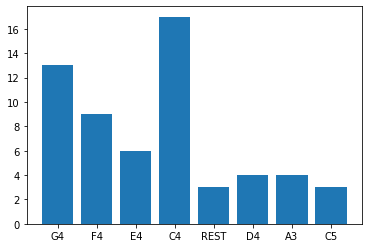

In [173]:
plt.bar(song_pitch_count.keys(), song_pitch_count.values())


<BarContainer object of 7 artists>

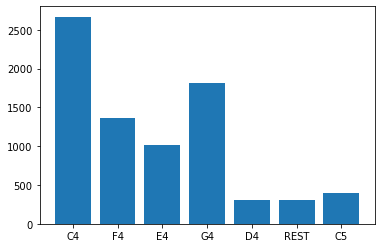

In [179]:
plt.bar(indiv_pitch_count.keys(), indiv_pitch_count.values())

In [ ]:
indiv = util.music21_score_to_individual(s)

In [182]:
sim = simulation.Simulation(1.0, 100, duration_matrix, pitch_matrix)

In [184]:
sim.run(5, pitch_matrix, duration_matrix, None)

Starting generation
False
Initializing population
Starting evolution
Average fitness: 2.037492202872164
Max fitness: 3.513685929086955
Iteration 0 done
Average fitness: 2.4395723854853077
Max fitness: 3.584521800114306
Iteration 1 done
Average fitness: 2.5362371443950606
Max fitness: 3.8691584999255038
Iteration 2 done
Average fitness: 2.6366138982316563
Max fitness: 3.9301530199984755
Iteration 3 done
Average fitness: 2.65609967877058
Max fitness: 4.110568306452246
Iteration 4 done
-------------------------------------------------
Done evolving, playing songs
Individual: 0
Interval pattern fitness: 0.3549078148025516
Duration pattern fitness: 0.7843107373170664
Chord tone beat fitness: 0.75
Chord tone fitness: 0.8103422619047618
Last note fitness: 0
Long note fitness: 1.3676470588235294
Interval size fitness: 0.0
Consecutive rests fitness: 0.0
Interval resolution fitness: 0.05555555555555555
duration change fitness: -0.012195121951219513
Total fitness in indiv: 4.110568306452246
Total

In [185]:
sim.duration_matrix

,quarter,eighth,half
quarter,0.500,0.333333,0.5
eighth,0.375,0.629630,0.5
half,0.125,0.037037,0.0


In [ ]:
c = chord.Chord(['C4', 'E4', 'G4'])
for n in c:
    print(n.pitch.nameWithOctave)